## Mini Project III

# mini-project-III
Repo with the instructions for the Mini Project III.


### Topics
This mini project is dedicated to following topics:
- Data Wrangling
- Data Visualization
- Data Preparation and Feature Engineering
- Dimensionality Reduction
- Unsupervised Learning

### Data
We will be using old data about different financial transactions. You can download the data from [here](https://drive.google.com/file/d/1zAjnf936aHkwVCq_BmA47p4lpRjyRzMf/view?usp=sharing). The data contains following tables:

- twm_customer - information about customers
- twm_accounts - information about accounts
- twm_checking_accounts - information about checking accounts (subset of twm_accounts)
- twm_credit_accounts - information about checking accounts (subset of twm_accounts)
- twm_savings_accounts - information about checking accounts (subset of twm_accounts)
- twm_transactions - information about financial transactions
- twm_savings_tran - information about savings transactions (subset of twm_transactions)
- twm_checking_tran - information about savings transactions (subset of twm_transactions)
- twm_credit_tran - information about credit checking (subset of twm_transactions)


### Output

In this miniproject, we will:

1.  create two separate customer segmentations (using clustering) to split them into 3-5 clusters: 
    - based on demographics (only on the information from twm_customer)
    - based on their banking behavior. We can take following things into consideration as banking behavior:
        - do they have savings account? How much do they save?
        - do they have credit account? How much do they live in debt?
        - are they making lot of small transactions or few huge ones?
2. visualize the created clusters using [radar charts](https://plotly.com/python/radar-chart/) and compare them agains each other
3. visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.
4. (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
    - we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.


# User defined fuctions

## required modules

In [1]:
#db tools
import sqlite3 as sqlite

from sqlite3 import Error
#important py tools
import pandas as pd
import numpy as np

# import Kmeans from sklearn
from sklearn.cluster import KMeans
# import DBSCAN
from sklearn.cluster import DBSCAN

### SQL

In [2]:
#custom db function
import sqlite3
from sqlite3 import Error

connection = 'test'

# sql modules
def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

# To execute queries in SQLite, use cursor.execute().
def ex_q(connection, query): # execute query
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")
        
def er_q(connection, query): #execute read query
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

def display_query(query,connection=connection):
    q = er_q(query,connection)
    return pd.read_sql_query(q, connection)

### K-means (unsupervised learning)

In [3]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        # y_res 
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

### Data Wrangling

In [4]:
def how_much_missing_data (df):
    """ Functions that takes a pd.DF and returns the total of missing values per columns:
        - count of how many are missing
        - from a scale 1(100%) to 0(0%)
        - dtypes    
    """
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    types = df.dtypes
    # also the scale is from 0 to 1
    missing_data = pd.concat([total, percent,types], axis=1, keys=['Total', 'Percent','dtypes'])
    return missing_data # only the first 20 rows but because of the order we don't have to go any futher

In [5]:
db_path  = '/home/henri/Documents/Lighthouse lab/lighthouse-data-notes/Week_4/w4-d2/miniproject3.db'

In [6]:
conn = create_connection(db_path)

Connection to SQLite DB successful


In [7]:
# import critical libraries
import pandas as pd
import numpy as np

In [8]:
hello_q = """
SELECT *
FROM checking_acct
"""

In [9]:
pd.read_sql_query(hello_q,conn).head()

acct_nbr  minimum_balance  per_check_fee account_active acct_start_date  \
0  13625482             3000           0.00              Y      11.11.1986   
1  13624872             3000           0.00              Y       12.1.1995   
2  13630172             3000           0.00              Y       19.3.1994   
3  13627522              100           0.15              Y        8.1.1994   
4  13632822              100           0.15              Y        5.3.1988   

  acct_end_date  starting_balance  ending_balance  cust_id  
0          NULL           6004.34          569.65  1362548  
1          NULL           2781.07         1401.21  1362487  
2          NULL           2694.91          147.15  1363017  
3          NULL            487.69            3.76  1362752  
4          NULL            133.90           84.18  1363282

In [10]:
#rstrip/lstrip

In [11]:
#plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# data analysis tools
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
# style choice
## Matplotlib
plt.style.use('dark_background') # seaborn
plt.rcParams["figure.figsize"] = (12,8)

## Part 1

In [13]:
#creating the query
customers_table_query = """
SELECT *
FROM customer
"""

In [14]:
df_customers_table_only = pd.read_sql_query(customers_table_query,conn)

### Inspecting the data

In [15]:
df_customers_table_only.head()

cust_id  income  age  years_with_bank  nbr_children gender  marital_status  \
0  1362480   50890   33                3             2      M               2   
1  1362481   20855   36                6             2      F               2   
2  1362484   10053   42                2             0      F               1   
3  1362485   22690   25                4             0      F               1   
4  1362486   10701   76                6             0      F               3   

  name_prefix first_name  last_name  street_nbr  street_name  postal_code  \
0         Mr.       Hans       Beed        6498            H        10209   
1        None      Darby       Beed        6498            H        10209   
2        None       Lana    Gilmore       13393         Rose        80275   
3         Dr.     Elvira  Linderman        4581     Daffodil        10140   
4         Ms.       Kyle   McVicker        9813  Sam Houston        75230   

       city_name state_code  
0  New York City         NY  
1  New York City         NY  
2         Denver         CO  
3  New York City         NY  
4         Dallas         TX

### removing/binning data

In [16]:
gender = { 'gender': {"M":0,"F":1}}
df_customers_table_only.replace(gender,inplace=True)

In [17]:
cust_object_col_list = df_customers_table_only.select_dtypes(include='object').columns.tolist()
cust_object_col_list

['name_prefix',
 'first_name',
 'last_name',
 'street_name',
 'city_name',
 'state_code']

In [18]:
# I do not see the use of the following collomuns: ['first_name', 'last_name', 'street_name', 'city_name', 'state_code']
# for location we have the postal code which encompass ['street_name', 'city_name', 'state_code']
df_customers_table_only = df_customers_table_only.drop(cust_object_col_list, axis=1)
#on top of that we probably do not need ['cust_id','street_nbr']
df_customers_table_only = df_customers_table_only.drop(columns=['cust_id','street_nbr'], axis=1)
#df.drop(columns=['B', 'C'])

In [19]:
how_much_missing_data(df_customers_table_only)

Total  Percent dtypes
postal_code          0      0.0  int64
marital_status       0      0.0  int64
gender               0      0.0  int64
nbr_children         0      0.0  int64
years_with_bank      0      0.0  int64
age                  0      0.0  int64
income               0      0.0  int64

In [20]:
df_customers_table_only.columns.tolist()

['income',
 'age',
 'years_with_bank',
 'nbr_children',
 'gender',
 'marital_status',
 'postal_code']

In [21]:
features = ["income","age", "years_with_bank", "nbr_children", "gender", "marital_status"]
df_customers_table_only[features].head()

income  age  years_with_bank  nbr_children  gender  marital_status
0   50890   33                3             2       0               2
1   20855   36                6             2       1               2
2   10053   42                2             0       1               1
3   22690   25                4             0       1               1
4   10701   76                6             0       1               3

## PCA

### why scalling is important
[article link](https://benalexkeen.com/feature-scaling-with-scikit-learn/)
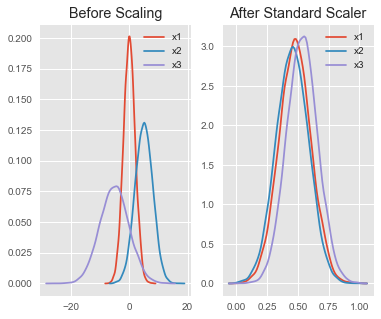

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datascaled = scaler.fit_transform(df_customers_table_only[features])

In [23]:
df_customer_scaled = pd.DataFrame(datascaled,columns=["income", "age", "years_with_bank", "nbr_children", "gender", "marital_status"])
df_customer_scaled.head()

income       age  years_with_bank  nbr_children    gender  marital_status
0  1.268983 -0.496242        -0.339448      1.165479 -1.127172        0.132149
1 -0.084411 -0.339191         0.782533      1.165479  0.887176        0.132149
2 -0.571155 -0.025089        -0.713442     -0.648298  0.887176       -0.989614
3 -0.001725 -0.915044         0.034546     -0.648298  0.887176       -0.989614
4 -0.541956  1.754822         0.782533     -0.648298  0.887176        1.253912

In [24]:
pca = PCA(n_components=6)

In [25]:
components = pca.fit_transform(df_customer_scaled)

In [26]:
pca.explained_variance_

array([1.81501037, 1.20087408, 1.04881669, 0.8625996 , 0.72196024,
       0.35878191])

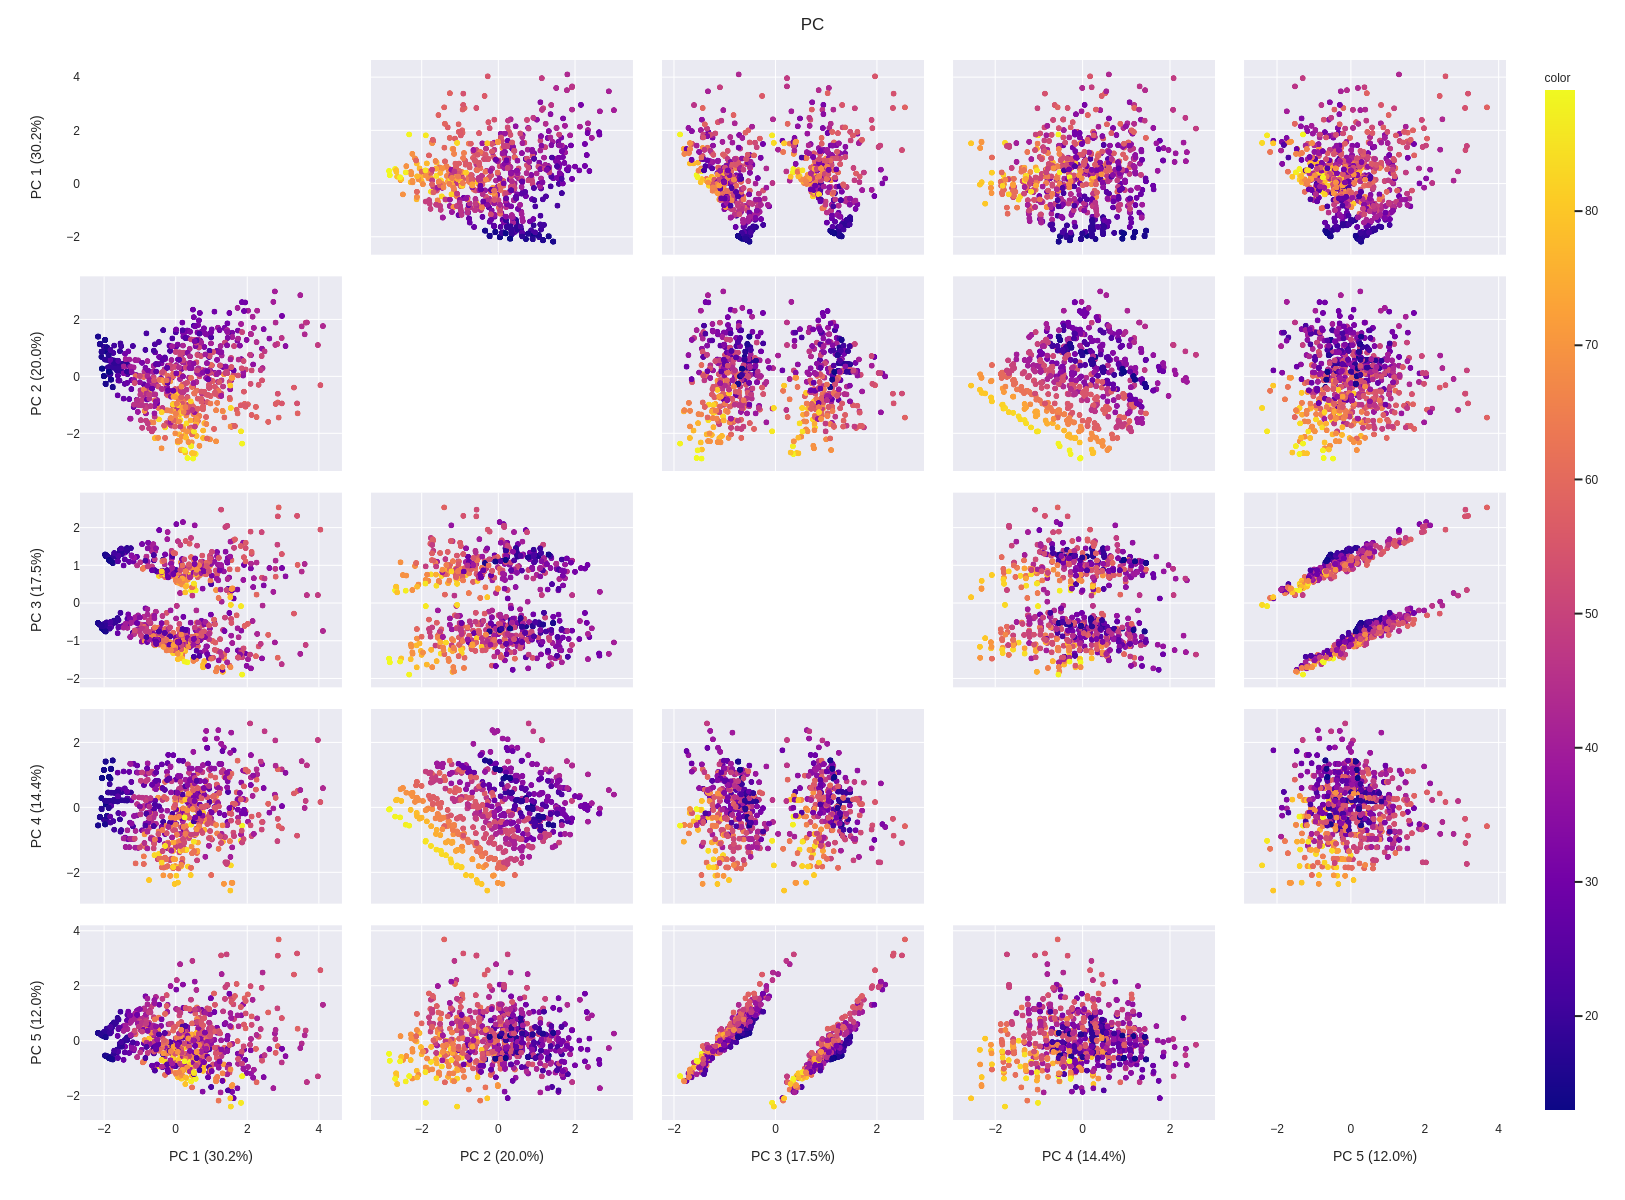

In [27]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color = df_customers_table_only['age']
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='PC',
    dragmode='select',
    width=1200,
    height=1200,
    hovermode='closest',
    template ="seaborn"
)
fig.show()

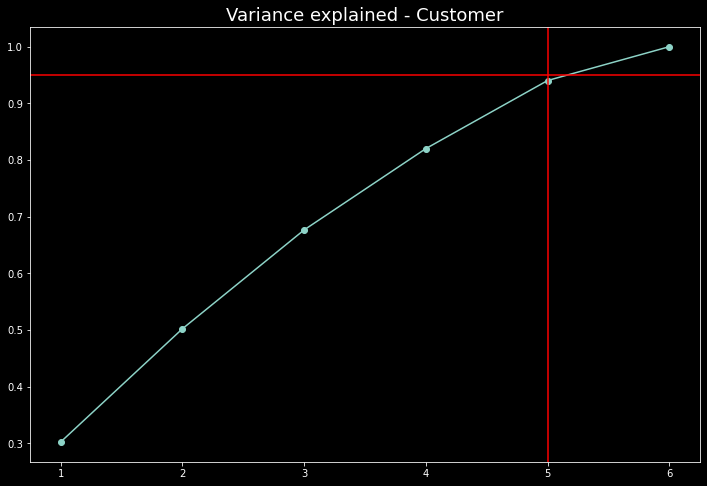

In [28]:
# Calculates the proportion of variance explained
var_exp_cust = np.cumsum(pca.explained_variance_ratio_)

# Plots the elbow plot for the wine pca
plt.plot(range(1,7), var_exp_cust, marker='o')
plt.title("Variance explained - Customer", fontsize=18);
plt.axhline(0.95,c='r')
plt.axvline(5,c='r')
plt.show()

## testing what I can do with the data

In [29]:
len(components[0])

6

In [30]:
components[:,0][:4]

array([ 1.16679692,  0.45714761, -1.34368237, -1.34395355])

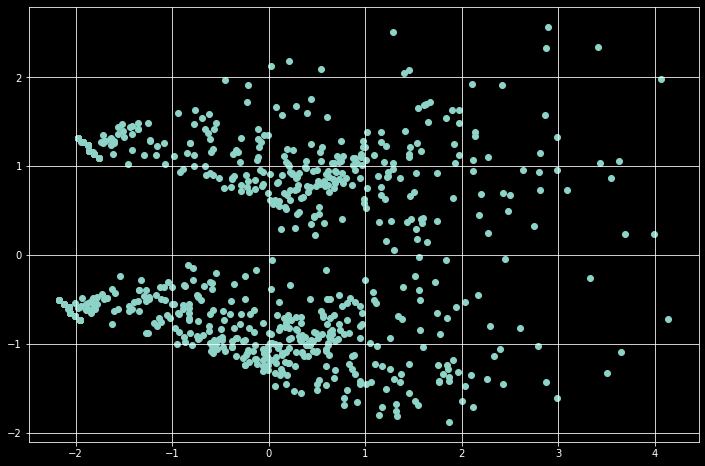

In [31]:
plt.scatter(components[:,0], # using slices
            components[:,2],
            marker='o')
plt.grid()
plt.show()

In [32]:
range(components.shape[1])

range(0, 6)

In [33]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [34]:
y_km = km.fit_predict(components)

## clustering with widgets

In [35]:
# import the widgets
import ipywidgets as widgets
# import the interact and the interact_manual from widgetss
from ipywidgets.widgets import interact, interact_manual

In [36]:
slider_eps = widgets.FloatSlider(
    min=.1,
    max=1,
    step=.1,
    description='EPS:\nthe maximum distance between two samples for one to be considered as being in the neighborhood of the other',
    value=.43
)
slider_min_val = widgets.IntSlider(
    min=2,
    max=10,
    step=1,
    description='minimum Value:\nmin # of points to be considered in a neighboor region to be considered a core',
    value=3
)
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)
n_clusters = widgets.IntSlider(
    min=1,
    max=8,
    step=1,
    description='Kmeans(n_clusters)',
    value=3
)
PC_x = widgets.IntSlider(
    min=0,
    max=7, # 5 max for customers only
    step=1,
    description='X axis PC:',
    value=2
)
PC_y = widgets.IntSlider(
    min=0,
    max=7, # 5 max for the 
    step=1,
    description='Y axis PC:',
    value=1
)
kmean_iteration = widgets.IntSlider(
    min=1,
    max=21, # 5 max for the 
    step=1,
    description='Kmeans iteration:\nNumber of time the k-means algorithm will be run with different centroid seeds.',
    value=1
)

## Kmeans clustering

In [164]:
def update_plot_kmeans(n_clusters,PC_x,PC_y,kmean_iteration):
    km = KMeans(n_clusters=n_clusters, # how many clusters we expected 
    n_init=kmean_iteration, # how many initial runs
    random_state=0)
    
    # data side
    X = components
    plt_cluster_centers= True
    
    y_km = km.fit_predict(X)
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_km):
        # y_res 
        x = X[y_km == cluster,PC_x]
        y = X[y_km == cluster,PC_y]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
        
    plt.xlabel(f'PC {PC_x+1}: {features[PC_x]}')
    plt.ylabel(f'PC {PC_y+1}: {features[PC_y]}')
    plt.title(f'Kmeans of PC{PC_x+1}: {features[PC_x]} / PC{PC_y+1}: {features[PC_y]}')
    plt.legend()
    plt.grid()
    plt.show()
#     for i in range(len(X_centroids)):
#         print(f'cluser {i} X:{X_centroids[i]}, Y:{Y_centroids[i]}')

In [165]:
km = KMeans(n_clusters=4, # how many clusters we expected 
    n_init=10, # how many initial runs
    random_state=99)
y_km = km.fit_predict(components)
y_km.shape

(747,)

In [166]:
widgets.interactive(update_plot_kmeans,n_clusters=n_clusters,PC_x=PC_x, PC_y=PC_y,kmean_iteration=kmean_iteration)

interactive(children=(IntSlider(value=5, description='Kmeans(n_clusters)', max=8, min=1), IntSlider(value=2, d…

## DBSCAN clustering

In [40]:
features

['income',
 'age',
 'years_with_bank',
 'nbr_children',
 'gender',
 'marital_status']

In [41]:
components[1]

array([ 0.45714761,  0.335578  , -0.97187138,  1.22044991,  0.15772527,
        0.34192777])

In [42]:
def update_plot_DBSCAN(slider_eps,slider_min_val,PC_x,PC_y):
    db = DBSCAN(eps=slider_eps,
                min_samples=slider_min_val,
                metric='euclidean')
    #out data
    X = components
    
    # fit and predict
    y_db = db.fit_predict(X)
    
    # Plot DBSCAN clusters   
    X_centroids = []
    Y_centroids = []
    plt_cluster_centers = True
    for cluster in set(y_db):
        x = X[y_db == cluster,PC_x]
        y = X[y_db == cluster,PC_y]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    
    plt.xlabel(f'PC{PC_x+1}: {features[PC_x]}')
    plt.ylabel(f'PC{PC_y+1}: {features[PC_y]}')
    plt.title(f'DBSCAN of PC{PC_x+1}: {features[PC_x]} / PC{PC_y+1}: {features[PC_y]}')
    plt.legend()
    plt.grid()
    plt.show()
#     for i in range(len(X_centroids)):
#         print(f'cluser {i} X:{X_centroids[i]}, Y:{Y_centroids[i]}')   

In [156]:
widgets.interactive(update_plot_DBSCAN,slider_eps=slider_eps,slider_min_val=slider_min_val,PC_x=PC_x, PC_y=PC_y)

interactive(children=(FloatSlider(value=0.43, description='EPS:\nthe maximum distance between two samples for …

## Return to Pandas and Analysis
Now that the algorithm has clustered the data we feed it back to the database and analyse

In [44]:
df_customers_table_only[features].shape

(747, 6)

In [45]:
y_km.shape

(747,)

In [46]:
y_km[:50]

array([1, 1, 3, 3, 2, 0, 2, 1, 1, 3, 3, 2, 0, 0, 2, 0, 3, 3, 2, 0, 3, 2,
       0, 2, 0, 2, 1, 1, 1, 3, 3, 2, 2, 0, 2, 2, 2, 1, 1, 3, 2, 0, 1, 0,
       2, 0, 1, 3, 3, 3], dtype=int32)

In [47]:
df_customers_table_only['clustering'] = y_km

In [48]:
df_customers_table_only.head()

income  age  years_with_bank  nbr_children  gender  marital_status  \
0   50890   33                3             2       0               2   
1   20855   36                6             2       1               2   
2   10053   42                2             0       1               1   
3   22690   25                4             0       1               1   
4   10701   76                6             0       1               3   

   postal_code  clustering  
0        10209           1  
1        10209           1  
2        80275           3  
3        10140           3  
4        75230           2

<AxesSubplot:>

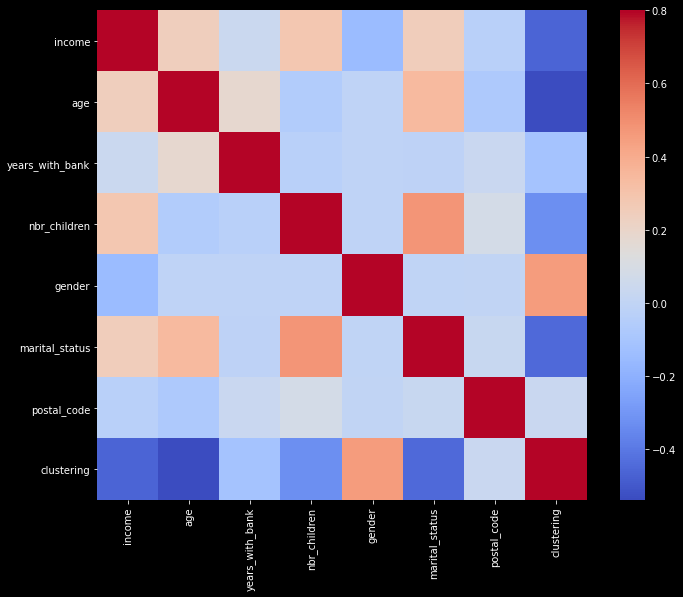

In [49]:
#correlation matrix
corrmat = df_customers_table_only.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='coolwarm')

In [50]:
df_customers_table_only.describe()

income         age  years_with_bank  nbr_children      gender  \
count     747.000000  747.000000       747.000000    747.000000  747.000000   
mean    22728.281124   42.479250         3.907631      0.714859    0.559572   
std     22207.221405   19.114879         2.675634      1.103410    0.496771   
min         0.000000   13.000000         0.000000      0.000000    0.000000   
25%      7118.500000   28.000000         2.000000      0.000000    0.000000   
50%     17242.000000   42.000000         4.000000      0.000000    1.000000   
75%     31338.000000   56.000000         6.000000      1.000000    1.000000   
max    144157.000000   89.000000         9.000000      5.000000    1.000000   

       marital_status   postal_code  clustering  
count      747.000000    747.000000  747.000000  
mean         1.882195  59502.690763    1.556894  
std          0.892051  31205.926508    1.133414  
min          1.000000   2149.000000    0.000000  
25%          1.000000  33145.000000    1.000000  
50%          2.000000  64132.000000    2.000000  
75%          2.000000  90082.000000    3.000000  
max          4.000000  98186.000000    3.000000

### patterns emerged once the data was grouped per cluster
A story is hidden under it

In [51]:
radar_df = df_customers_table_only.groupby(df_customers_table_only.clustering).mean().drop(columns=['postal_code'],axis=1)
radar_df

income        age  years_with_bank  nbr_children    gender  \
clustering                                                                     
0           34284.744565  55.766304         4.570652      0.429348  0.000000   
1           29402.572289  37.915663         3.192771      2.385542  0.650602   
2           23162.711340  57.221649         4.551546      0.242268  1.000000   
3            6380.492611  20.078818         3.275862      0.059113  0.571429   

            marital_status  
clustering                  
0                 1.978261  
1                 2.728916  
2                 1.891753  
3                 1.093596

What is the story??
* cluster 0: all older men, mostly married, like group 2 most are empty nester
* cluster 1: men and women who have a high propencity of divorce, have plenty of kids and surprisingly been the least amount of time with the bank
* cluster 2: all older women, mostly married but to a lesser extand to men, makes abou 50% less than men their age
* cluster 3: Young folks, almost all single and kidless and 

## compressing columns
(so that they do not dwarf smaller values since there is no log polar plot that I know of )

In [52]:
radar_df['income'] = radar_df['income']/10000

In [53]:
radar_df['age'] = radar_df['age']/10

In [54]:
radar_df

income       age  years_with_bank  nbr_children    gender  \
clustering                                                                
0           3.428474  5.576630         4.570652      0.429348  0.000000   
1           2.940257  3.791566         3.192771      2.385542  0.650602   
2           2.316271  5.722165         4.551546      0.242268  1.000000   
3           0.638049  2.007882         3.275862      0.059113  0.571429   

            marital_status  
clustering                  
0                 1.978261  
1                 2.728916  
2                 1.891753  
3                 1.093596

In [55]:
radar_df.columns[:]

Index(['income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status'],
      dtype='object')

# plotting the data in a radar plot

In [56]:
radar_df.loc[0]

income             3.428474
age                5.576630
years_with_bank    4.570652
nbr_children       0.429348
gender             0.000000
marital_status     1.978261
Name: 0, dtype: float64

In [57]:
# fig = px.line_polar(radar_df, r='r', theta='theta', line_close=True)
# fig.show()

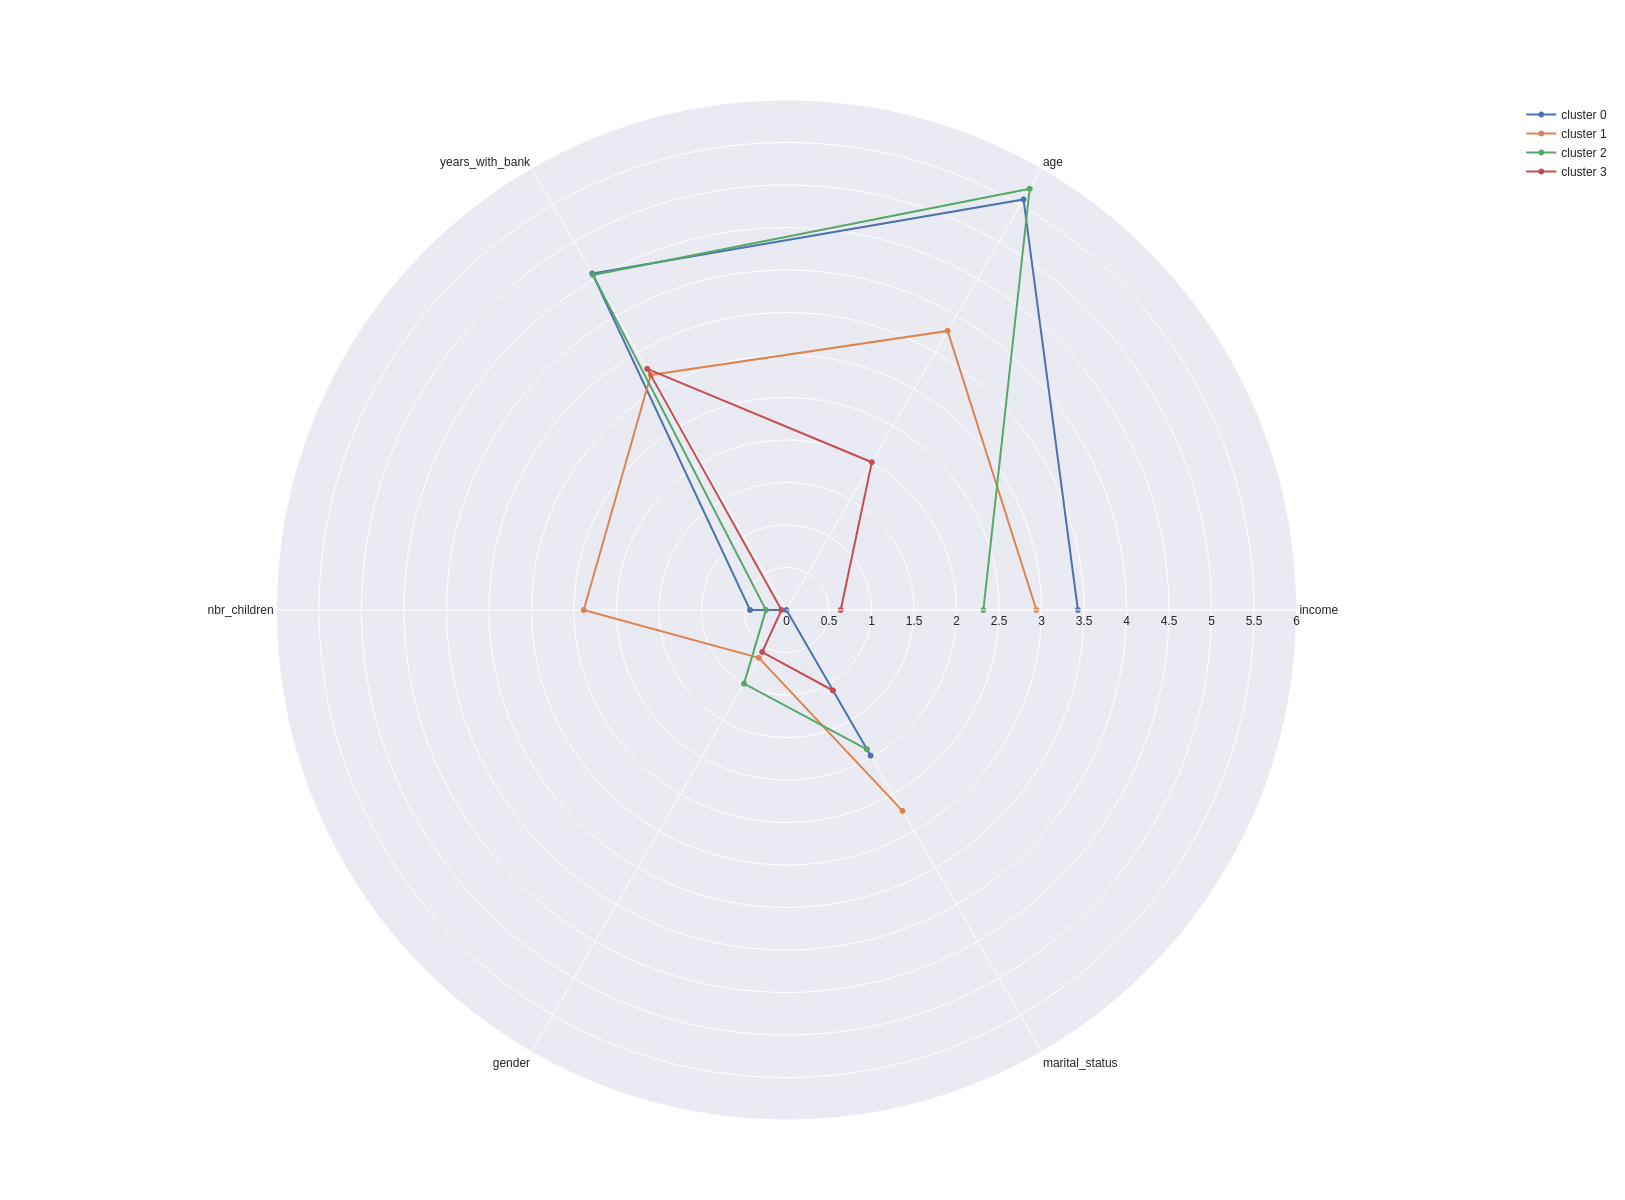

In [58]:
import plotly.graph_objects as go

categories = ['income', 'age', 'years_with_bank', 'nbr_children', 'gender',
       'marital_status']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=radar_df.loc[0],
      theta=categories,
      #fill='toself',
      name='cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=radar_df.loc[1],
      theta=categories,
      #fill='toself',
      name='cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=radar_df.loc[2],
      theta=categories,
      #fill='toself',
      name='cluster 2'
))
fig.add_trace(go.Scatterpolar(
      r=radar_df.loc[3],
      theta=categories,
      #fill='toself',
      name='cluster 3'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 6]
    )),
  showlegend=True
)
fig.update_layout(
    dragmode='select',
    width=1200,
    height=1200,
    hovermode='closest',
    template ="seaborn"
)
fig.show()

# Part 2

## SQL

In [59]:
customers_query_balance = """
SELECT
c.cust_id,
c.income,
c.age,
c.years_with_bank,
c.nbr_children,
c.gender,
c.marital_status,
c.first_name,
c.last_name,
c.street_name,
c.postal_code,
c.city_name,
c.state_code,
ca.acct_nbr AS 'checking acct num',
ca.ending_balance AS 'checking balance',
sa.acct_nbr AS 'saving acct num',
sa.ending_balance AS 'saving balance',
cra.acct_nbr AS 'credit acct num',
cra.ending_balance AS 'credit balance',
(IFNULL(ca.ending_balance,0) + IFNULL(sa.ending_balance,0) - IFNULL(cra.ending_balance,0) ) AS 'net worth'

FROM customer c
LEFT JOIN checking_acct ca
	ON c.cust_id = ca.cust_id
LEFT JOIN savings_acct sa
	ON c.cust_id = sa.cust_id
LEFT JOIN credit_acct cra
	ON c.cust_id = cra.cust_id
WHERE NOT (ca.ending_balance AND sa.ending_balance AND cra.ending_balance )IS NULL;

"""

In [60]:
pd_raw_customers = pd.read_sql_query(customers_query_balance,conn)

## Data Exploration

In [61]:
pd_raw_customers.head()

cust_id  income  age  years_with_bank  nbr_children gender  marital_status  \
0  1362480   50890   33                3             2      M               2   
1  1362484   10053   42                2             0      F               1   
2  1362487    6605   71                1             0      M               2   
3  1362489   55888   35                5             2      F               3   
4  1362508    9802   66                6             0      F               3   

  first_name last_name street_name  postal_code      city_name state_code  \
0       Hans      Beed           H        10209  New York City         NY   
1       Lana   Gilmore        Rose        80275         Denver         CO   
2   ChingDyi  Moussavi    Daffodil        90159    Los Angeles         CA   
3       Inge   Cassidy       Union        37208      Nashville         TN   
4        Pat      Hays  Old Cliffs        63105       St Louis         MO   

   checking acct num  checking balance  saving acct num  saving balance  \
0         13624802.0             86.86       13624803.0         1187.97   
1         13624842.0             95.32       13624843.0         2122.17   
2         13624872.0           1401.21       13624873.0           12.89   
3         13624892.0            125.43       13624893.0          373.65   
4         13625082.0             75.11       13625083.0          255.11   

   credit acct num  credit balance  net worth  
0     4.561143e+15           20.00    1254.83  
1     4.561143e+15          369.72    1847.77  
2     4.561143e+15         1548.23    -134.13  
3     4.561143e+15           20.00     479.08  
4     4.561143e+15         1072.17    -741.95

In [62]:
networth_to_transact = pd_raw_customers[['cust_id','checking balance','saving balance','credit balance','net worth']].rename(columns={"cust_id": "customer_id"})
networth_to_transact.head()

customer_id  checking balance  saving balance  credit balance  net worth
0      1362480             86.86         1187.97           20.00    1254.83
1      1362484             95.32         2122.17          369.72    1847.77
2      1362487           1401.21           12.89         1548.23    -134.13
3      1362489            125.43          373.65           20.00     479.08
4      1362508             75.11          255.11         1072.17    -741.95

In [63]:
pd_raw_customers = pd_raw_customers.drop(['cust_id'],axis=1)

In [64]:
pd_raw_customers.gender.unique()

array(['M', 'F'], dtype=object)

In [65]:
gender = { 'gender': {"M":0,"F":1}}
pd_raw_customers.replace(gender,inplace=True)

In [66]:
pd_raw_customers.describe()

income        age  years_with_bank  nbr_children      gender  \
count     273.000000  273.00000       273.000000    273.000000  273.000000   
mean    22110.377289   44.96337         3.871795      0.695971    0.593407   
std     20437.412651   18.84609         2.686098      1.087640    0.492100   
min         0.000000   16.00000         0.000000      0.000000    0.000000   
25%      7467.000000   30.00000         2.000000      0.000000    0.000000   
50%     17052.000000   45.00000         4.000000      0.000000    1.000000   
75%     31054.000000   58.00000         6.000000      1.000000    1.000000   
max    142274.000000   89.00000         9.000000      5.000000    1.000000   

       marital_status   postal_code  checking acct num  checking balance  \
count      273.000000    273.000000       2.660000e+02        266.000000   
mean         2.010989  57505.805861       1.362984e+07        711.543534   
std          1.001776  31264.969057       2.897889e+03       1027.826214   
min          1.000000   2149.000000       1.362480e+07          0.000000   
25%          1.000000  30359.000000       1.362735e+07         63.945000   
50%          2.000000  60666.000000       1.362979e+07        277.770000   
75%          2.000000  87194.000000       1.363251e+07        953.077500   
max          4.000000  98186.000000       1.363493e+07       5651.400000   

       saving acct num  saving balance  credit acct num  credit balance  \
count     2.560000e+02      256.000000     2.680000e+02      268.000000   
mean      1.362983e+07     1285.103086     4.561143e+15      998.122201   
std       2.896282e+03     2285.513202     2.914985e+03     1095.151782   
min       1.362480e+07        2.740000     4.561143e+15        0.000000   
25%       1.362733e+07      249.957500     4.561143e+15      170.480000   
50%       1.362979e+07      683.960000     4.561143e+15      924.485000   
75%       1.363249e+07     1507.757500     4.561143e+15     1202.025000   
max       1.363493e+07    22432.780000     4.561143e+15     9500.000000   

          net worth  
count    273.000000  
mean     918.535604  
std     2750.765119  
min    -5646.760000  
25%     -330.790000  
50%      378.030000  
75%     1373.120000  
max    26772.610000

In [67]:
pd_raw_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   income             273 non-null    int64  
 1   age                273 non-null    int64  
 2   years_with_bank    273 non-null    int64  
 3   nbr_children       273 non-null    int64  
 4   gender             273 non-null    int64  
 5   marital_status     273 non-null    int64  
 6   first_name         273 non-null    object 
 7   last_name          273 non-null    object 
 8   street_name        273 non-null    object 
 9   postal_code        273 non-null    int64  
 10  city_name          273 non-null    object 
 11  state_code         273 non-null    object 
 12  checking acct num  266 non-null    float64
 13  checking balance   266 non-null    float64
 14  saving acct num    256 non-null    float64
 15  saving balance     256 non-null    float64
 16  credit acct num    268 non

## Data wrangling/feature engineering

In [68]:
cust_object_col_list = pd_raw_customers.select_dtypes(include='object').columns.tolist()

In [69]:
# I do not see the use of the following collomuns: ['first_name', 'last_name', 'street_name', 'city_name', 'state_code']
# for location we have the postal code which encompass ['street_name', 'city_name', 'state_code']
Pd_num_customers = pd_raw_customers.drop(cust_object_col_list, axis=1)

In [70]:
# for plotting we do not need to know what their account numbers are.
# we will replace any null values with 0 (null means they don't have an account)
customer_networth = Pd_num_customers.drop(['checking acct num','saving acct num','credit acct num','postal_code'], axis=1)
customer_networth.head()

income  age  years_with_bank  nbr_children  gender  marital_status  \
0   50890   33                3             2       0               2   
1   10053   42                2             0       1               1   
2    6605   71                1             0       0               2   
3   55888   35                5             2       1               3   
4    9802   66                6             0       1               3   

   checking balance  saving balance  credit balance  net worth  
0             86.86         1187.97           20.00    1254.83  
1             95.32         2122.17          369.72    1847.77  
2           1401.21           12.89         1548.23    -134.13  
3            125.43          373.65           20.00     479.08  
4             75.11          255.11         1072.17    -741.95

<AxesSubplot:>

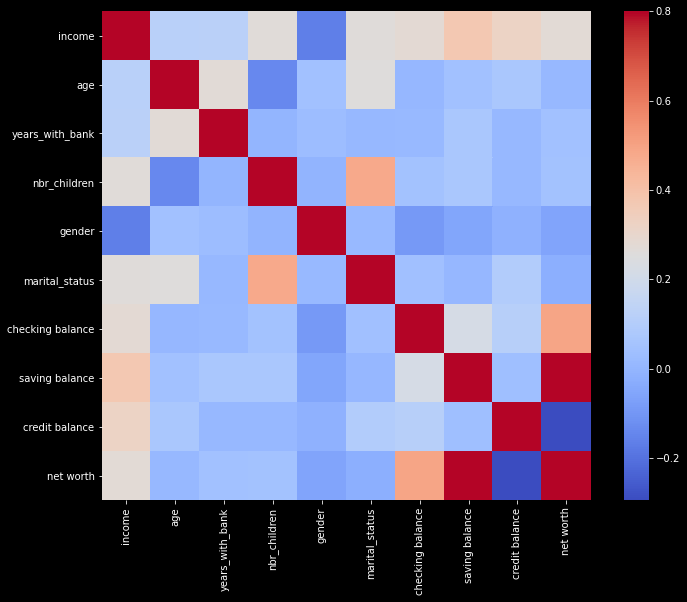

In [71]:
#correlation matrix
corrmat = customer_networth.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='coolwarm')

In [72]:
# we have some missing values
how_much_missing_data(customer_networth)

Total   Percent   dtypes
saving balance       17  0.062271  float64
checking balance      7  0.025641  float64
credit balance        5  0.018315  float64
net worth             0  0.000000  float64
marital_status        0  0.000000    int64
gender                0  0.000000    int64
nbr_children          0  0.000000    int64
years_with_bank       0  0.000000    int64
age                   0  0.000000    int64
income                0  0.000000    int64

In [73]:
customer_networth = customer_networth.fillna(0)

In [74]:
how_much_missing_data(customer_networth)

Total  Percent   dtypes
net worth             0      0.0  float64
credit balance        0      0.0  float64
saving balance        0      0.0  float64
checking balance      0      0.0  float64
marital_status        0      0.0    int64
gender                0      0.0    int64
nbr_children          0      0.0    int64
years_with_bank       0      0.0    int64
age                   0      0.0    int64
income                0      0.0    int64

## Outlier detection

<AxesSubplot:xlabel='income', ylabel='net worth'>

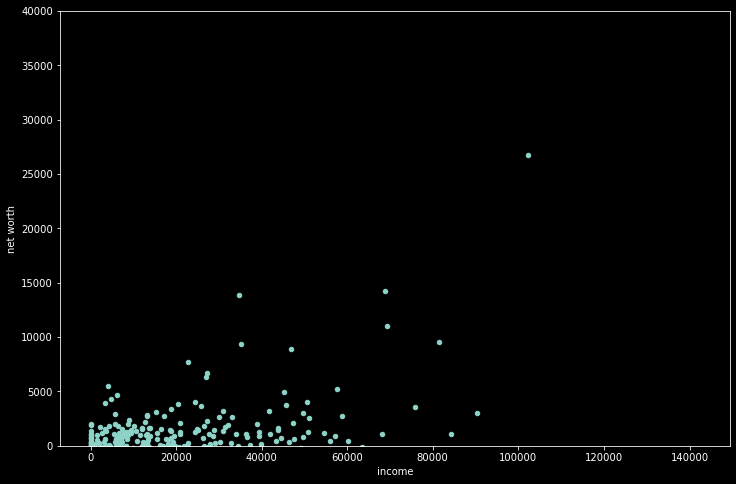

In [75]:
#scatter plot totalbsmtsf/saleprice
var = 'income' #: Total square feet of basement area
data = customer_networth[['net worth',var]]
data.plot.scatter(x=var, y='net worth', ylim=(0,40000))

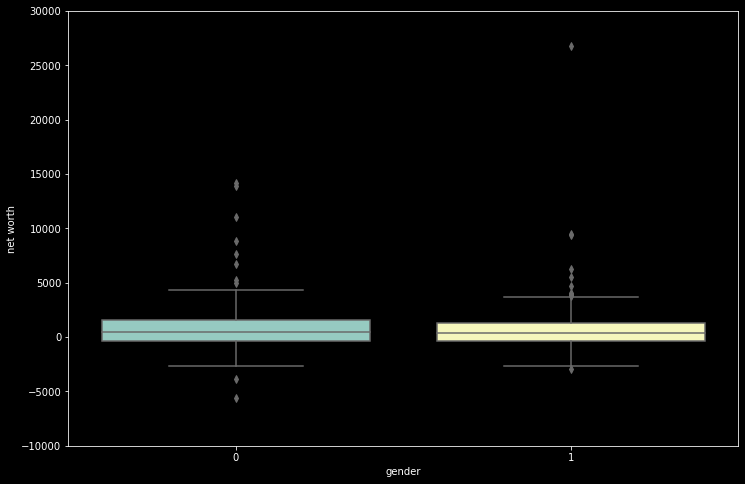

In [76]:
var = 'gender'
data = customer_networth[['net worth',var]]
f, ax = plt.subplots()
fig = sns.boxplot(x=var, y='net worth', data=data)
fig.axis(ymin=-10000, ymax=30000)
plt.show()

In [77]:
networth_outlier_ind = customer_networth[(customer_networth['net worth']>5000)|(customer_networth['net worth']<(-4000))].index
networth_outlier_ind 

Int64Index([28, 35, 56, 65, 66, 80, 144, 148, 160, 170, 194, 223, 271], dtype='int64')

In [78]:
customer_networth = customer_networth.drop(networth_outlier_ind)

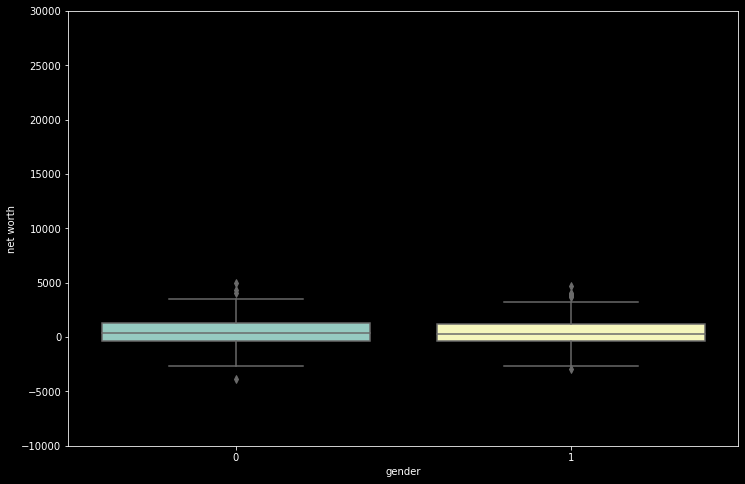

In [79]:
var = 'gender'
data = customer_networth[['net worth',var]]
f, ax = plt.subplots()
fig = sns.boxplot(x=var, y='net worth', data=data)
fig.axis(ymin=-10000, ymax=30000)
plt.show()

## PCA

In [80]:
features2 = customer_networth.columns.tolist()
features2 

['income',
 'age',
 'years_with_bank',
 'nbr_children',
 'gender',
 'marital_status',
 'checking balance',
 'saving balance',
 'credit balance',
 'net worth']

In [81]:
networth_scaled = scaler.fit_transform(customer_networth)

In [82]:
customer_networth_scaled = pd.DataFrame(networth_scaled,columns=features2)
customer_networth_scaled.head()

income       age  years_with_bank  nbr_children    gender  \
0  1.719362 -0.624419        -0.315168      1.193892 -1.234614   
1 -0.587114 -0.150177        -0.685955     -0.626706  0.809970   
2 -0.781857  1.377938        -1.056741     -0.626706 -1.234614   
3  2.001649 -0.519032         0.426404      1.193892  0.809970   
4 -0.601290  1.114470         0.797191     -0.626706  0.809970   

   marital_status  checking balance  saving balance  credit balance  net worth  
0       -0.003824         -0.605183        0.369933       -0.909782   0.541614  
1       -0.998112         -0.595573        1.398318       -0.573651   0.969892  
2       -0.003824          0.887828       -0.923616        0.559068  -0.461626  
3        0.990463         -0.561370       -0.526485       -0.909782  -0.018707  
4        0.990463         -0.618530       -0.656976        0.101505  -0.900652

In [83]:
pca = PCA(n_components=8)

In [84]:
nw_components = pca.fit_transform(customer_networth_scaled)

In [85]:
nw_components.shape

(260, 8)

In [86]:
pca.explained_variance_

array([1.94814019, 1.82482598, 1.36009603, 1.25090292, 1.03499824,
       0.90029526, 0.81377271, 0.54638033])

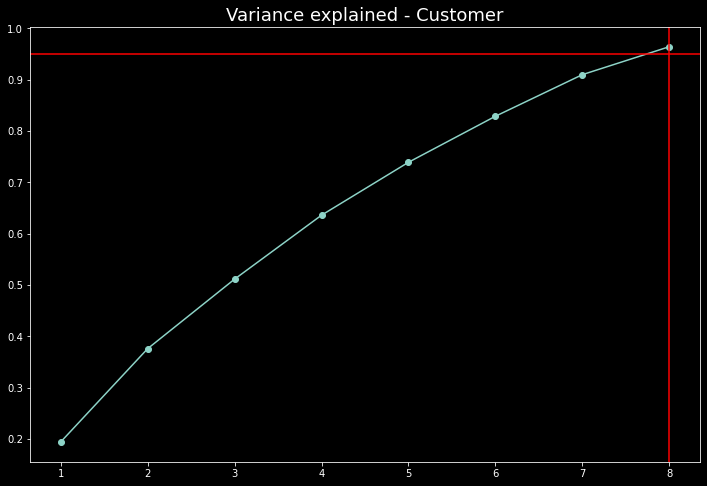

In [87]:
# Calculates the proportion of variance explained
var_exp_cust = np.cumsum(pca.explained_variance_ratio_)

# Plots the elbow plot for the wine pca
plt.plot(range(1,9), var_exp_cust, marker='o')
plt.title("Variance explained - Customer", fontsize=18);
plt.axhline(0.95,c='r')
plt.axvline(8,c='r')
plt.show()

In [88]:
pca.explained_variance_ratio_

array([0.19406473, 0.18178074, 0.13548649, 0.12460918, 0.10310175,
       0.08968326, 0.08106428, 0.05442789])

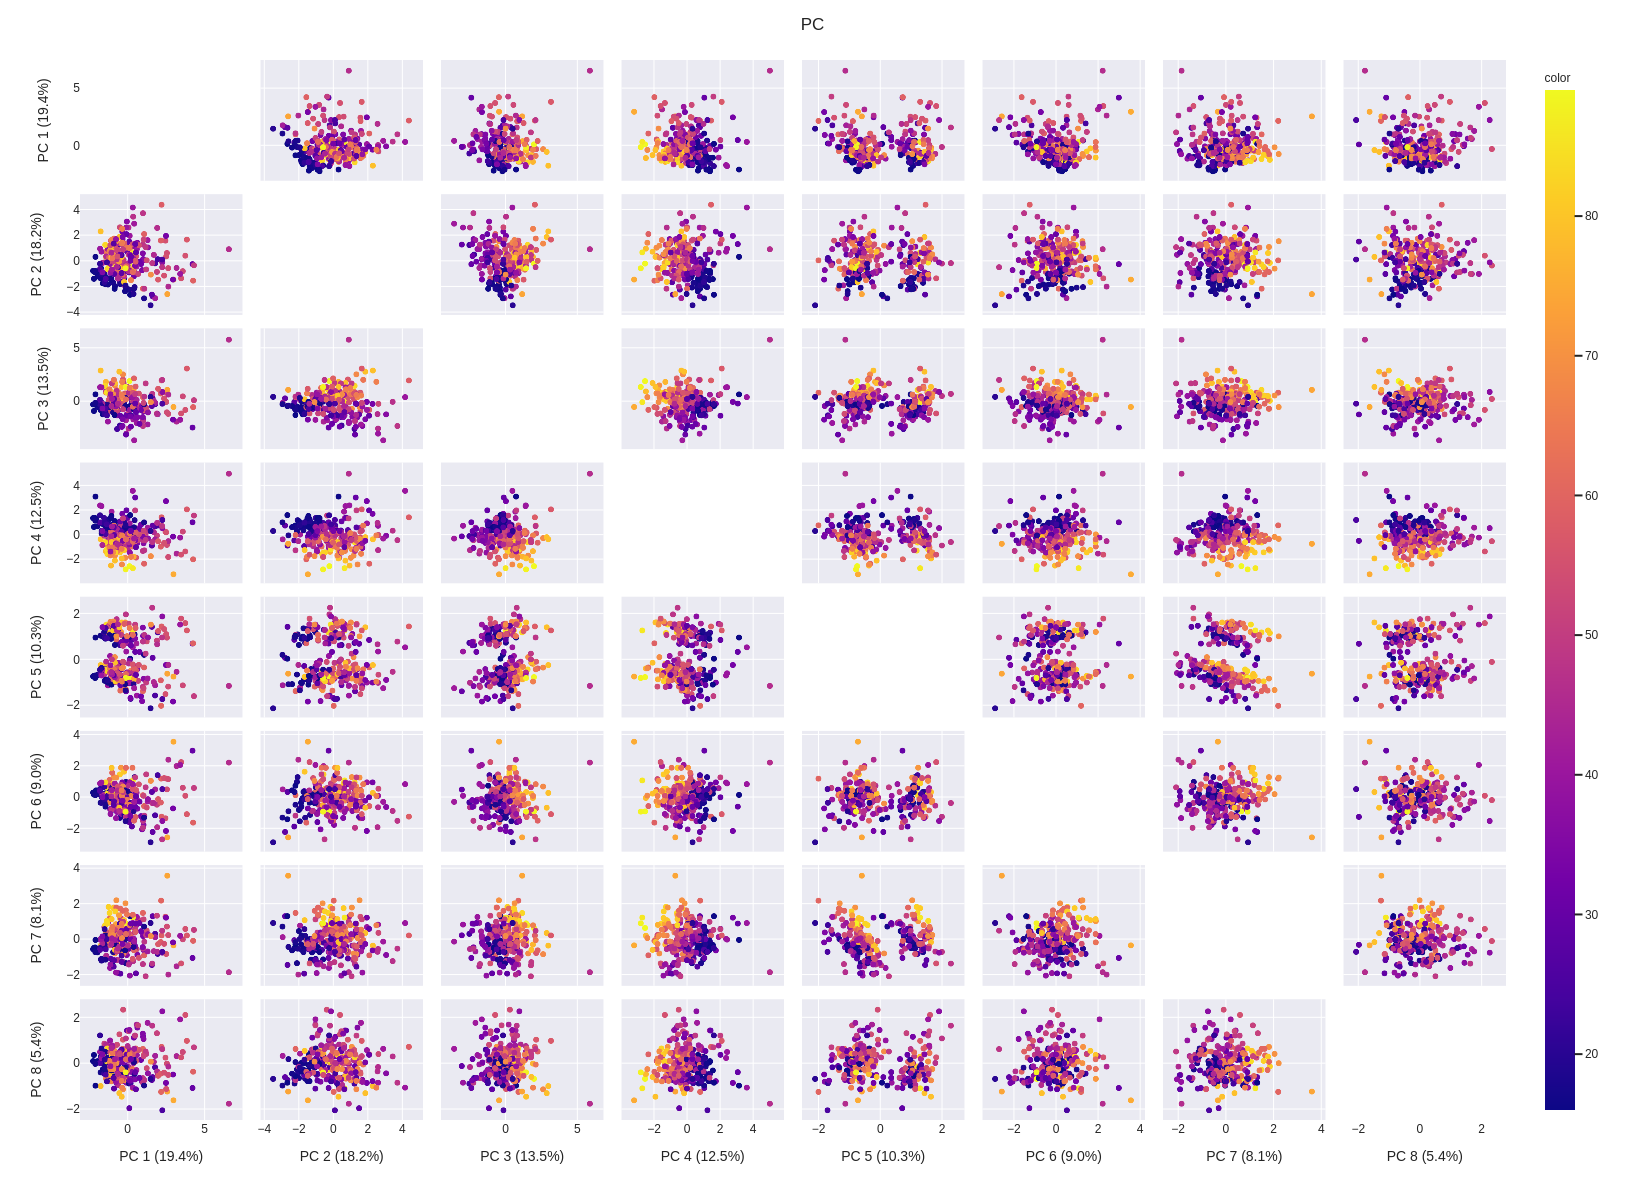

In [89]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    nw_components,
    labels=labels,
    dimensions=range(8),
    color = customer_networth['age']
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='PC',
    dragmode='select',
    width=1200,
    height=1200,
    hovermode='closest',
    template ="seaborn"
)
fig.show()

## Kmeans clustering

In [90]:
def update_plot_kmeans(n_clusters,PC_x,PC_y):
    km = KMeans(n_clusters=n_clusters, # how many clusters we expected 
    n_init=10, # how many initial runs
    random_state=0)
    
    # data side
    X = nw_components
    plt_cluster_centers= True
    
    y_km = km.fit_predict(X)
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_km):
        # y_res 
        x = X[y_km == cluster,PC_x]
        y = X[y_km == cluster,PC_y]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
        
    plt.xlabel(f'PC {PC_x+1}: {features2[PC_x]}')
    plt.ylabel(f'PC {PC_y+1}: {features2[PC_y]}')
    plt.title(f'Kmeans of PC{PC_x+1}: {features2[PC_x]} as X, PC{PC_y+1}: {features2[PC_y]} as Y')
    plt.legend()
    plt.grid()
    plt.show()
#     for i in range(len(X_centroids)):
#         print(f'cluser {i} X:{X_centroids[i]}, Y:{Y_centroids[i]}')

In [91]:
km = KMeans(n_clusters=4, # how many clusters we expected 
    n_init=10, # how many initial runs
    random_state=99)
y_kmnw = km.fit_predict(nw_components)
y_kmnw.shape

(260,)

In [92]:
widgets.interactive(update_plot_kmeans,n_clusters=n_clusters,PC_x=PC_x, PC_y=PC_y)

interactive(children=(IntSlider(value=3, description='Kmeans(n_clusters)', max=8, min=1), IntSlider(value=2, d…

## Part 2: back to Pandas 

In [93]:
customer_networth['clustering'] = y_kmnw

In [94]:
customer_networth.head()

income  age  years_with_bank  nbr_children  gender  marital_status  \
0   50890   33                3             2       0               2   
1   10053   42                2             0       1               1   
2    6605   71                1             0       0               2   
3   55888   35                5             2       1               3   
4    9802   66                6             0       1               3   

   checking balance  saving balance  credit balance  net worth  clustering  
0             86.86         1187.97           20.00    1254.83           2  
1             95.32         2122.17          369.72    1847.77           1  
2           1401.21           12.89         1548.23    -134.13           3  
3            125.43          373.65           20.00     479.08           2  
4             75.11          255.11         1072.17    -741.95           3

In [95]:
radar_networth = customer_networth.groupby(customer_networth.clustering).mean()
radar_networth

income        age  years_with_bank  nbr_children    gender  \
clustering                                                                     
0           37603.714286  47.523810         4.238095      0.761905  0.500000   
1            8153.828125  24.375000         2.406250      0.031250  0.500000   
2           28045.135593  38.457627         3.423729      2.237288  0.576271   
3           16427.715789  61.431579         4.915789      0.136842  0.736842   

            marital_status  checking balance  saving balance  credit balance  \
clustering                                                                     
0                 2.166667       1862.392381     1897.334286     1329.995000   
1                 1.109375        488.383438      719.774375      756.267969   
2                 2.932203        295.292034      624.318305      982.976780   
3                 1.957895        360.030842      620.105579      937.361368   

              net worth  
clustering               
0           2429.731667  
1            451.889844  
2            -63.366441  
3             42.775053

## We have to scale the data down
(I don't know how to make a log polar plot)

In [96]:
money_cat = ['income','checking balance','saving balance','credit balance','net worth']
radar_networth[money_cat] = radar_networth[money_cat]/10000
radar_networth['age'] = radar_networth['age']/10

In [97]:
radar_networth

income       age  years_with_bank  nbr_children    gender  \
clustering                                                                
0           3.760371  4.752381         4.238095      0.761905  0.500000   
1           0.815383  2.437500         2.406250      0.031250  0.500000   
2           2.804514  3.845763         3.423729      2.237288  0.576271   
3           1.642772  6.143158         4.915789      0.136842  0.736842   

            marital_status  checking balance  saving balance  credit balance  \
clustering                                                                     
0                 2.166667          0.186239        0.189733        0.132999   
1                 1.109375          0.048838        0.071977        0.075627   
2                 2.932203          0.029529        0.062432        0.098298   
3                 1.957895          0.036003        0.062011        0.093736   

            net worth  
clustering             
0            0.242973  
1            0.045189  
2           -0.006337  
3            0.004278

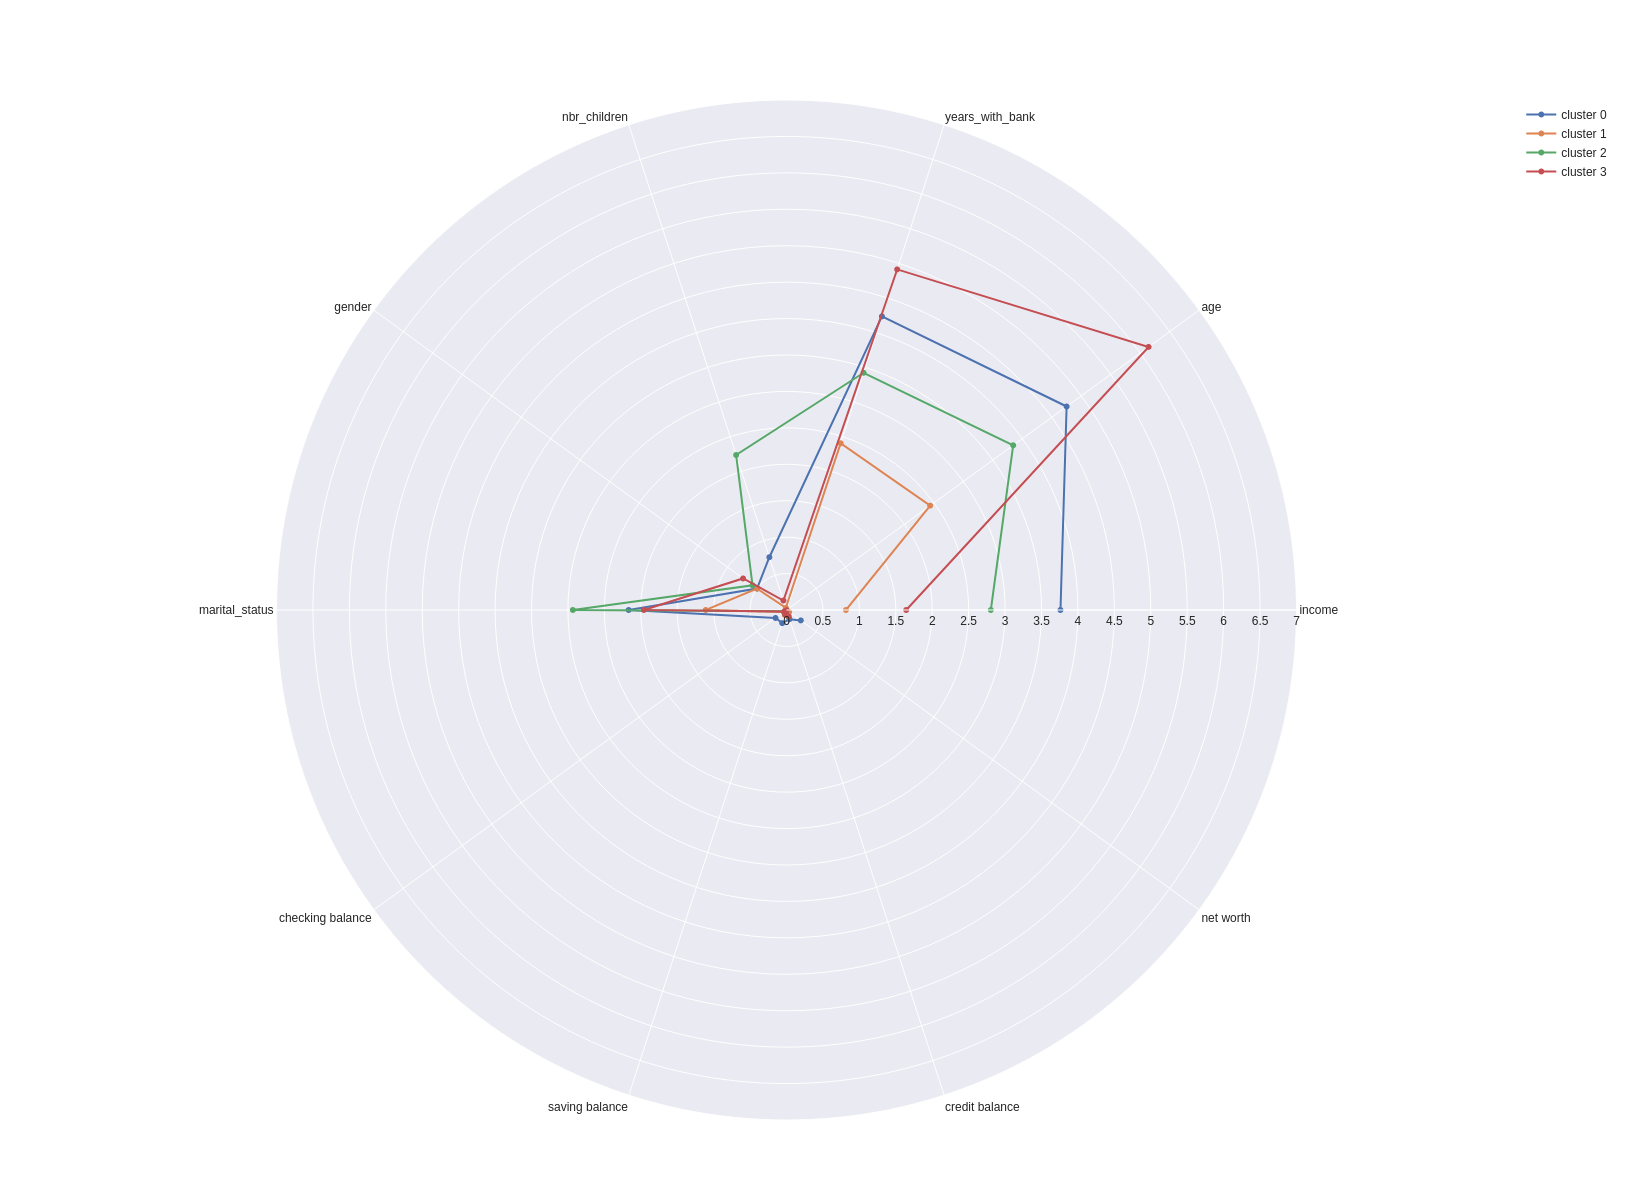

In [98]:
categories = radar_networth.columns.tolist()

fig = go.Figure()

traces = [fig.add_trace(go.Scatterpolar(r=radar_networth.loc[i],theta=categories,name=f'cluster {i}')) for i in range(len(radar_networth.index))]

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 7]
    )),
  showlegend=True
)
fig.update_layout(
    dragmode='select',
    width=1200,
    height=1200,
    hovermode='closest',
    template ="seaborn"
)
fig.show()

# PART 3: transactions

In [99]:
transaction_query = """SELECT 
coalesce(ct.cust_id, st.cust_id, crt.cust_id) as 'customer_id',
t.acct_nbr, 
t.tran_amt,
t.principal_amt,
t.interest_amt,
ct.acct_nbr AS 'checking',
st.acct_nbr AS 'saving',
crt.acct_nbr AS 'credit'
FROM transactions t 
LEFT JOIN -- checking transactions
(	
	SELECT 
	ct.tran_id,
	ct.tran_amt, -- we actually do not even need the 3 amt#
	ct.principal_amt, 
	ct.interest_amt,
	ca.acct_nbr,
	ca.cust_id
	FROM checking_tran ct
	JOIN checking_acct ca
		ON ct.cust_id = ca.cust_id
	) as ct --ct for checking_tran
ON t.acct_nbr = ct.acct_nbr AND t.tran_id = ct.tran_id -- requires a composite key join
LEFT JOIN -- saving transactions
(
	SELECT 
	st.tran_id,
	st.tran_amt,
	st.principal_amt,
	st.interest_amt,
	sa.acct_nbr,
	sa.cust_id
	FROM savings_tran st
	JOIN savings_acct sa
		ON st.cust_id = sa.cust_id
		) AS st --st for savings_tran
ON t.acct_nbr = st.acct_nbr AND t.tran_id = st.tran_id
LEFT JOIN -- credit transactions
(
	SELECT 
	crt.tran_id,
	crt.tran_amt,
	crt.principal_amt,
	crt.interest_amt,
	cra.acct_nbr,
	cra.cust_id
	FROM credit_tran crt
	JOIN credit_acct cra
		ON crt.cust_id = cra.cust_id
) AS crt
ON t.acct_nbr = crt.acct_nbr AND t.tran_id = crt.tran_id"""

In [100]:
transactions_df = pd.read_sql_query(transaction_query,conn)
transactions_df.shape 

(77580, 8)

## Data exploration

In [101]:
#cust_behavior = pd.merge(num_customer_transactions,avg_customer_transactions, on='customer_id')
transactions_df=pd.merge(transactions_df,networth_to_transact, on='customer_id')

In [102]:
transactions_df.head()

customer_id  acct_nbr  tran_amt  principal_amt  interest_amt    checking  \
0    1362562.0  13625623      0.00           0.00           0.0         NaN   
1    1362562.0  13625622    -41.32         -41.32           0.0  13625622.0   
2    1362562.0  13625623    140.63         140.63           0.0         NaN   
3    1362562.0  13625622   -359.59        -359.59           0.0  13625622.0   
4    1362562.0  13625622    740.40         740.40           0.0  13625622.0   

       saving  credit  checking balance  saving balance  credit balance  \
0  13625623.0     NaN           5521.65         3864.77          9500.0   
1         NaN     NaN           5521.65         3864.77          9500.0   
2  13625623.0     NaN           5521.65         3864.77          9500.0   
3         NaN     NaN           5521.65         3864.77          9500.0   
4         NaN     NaN           5521.65         3864.77          9500.0   

   net worth  
0    -113.58  
1    -113.58  
2    -113.58  
3    -113.58  
4    -113.58

In [103]:
#some garbage data was in the transaction table
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40484 entries, 0 to 40483
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       40484 non-null  float64
 1   acct_nbr          40484 non-null  int64  
 2   tran_amt          40484 non-null  float64
 3   principal_amt     40484 non-null  float64
 4   interest_amt      40484 non-null  float64
 5   checking          22990 non-null  float64
 6   saving            6654 non-null   float64
 7   credit            10840 non-null  float64
 8   checking balance  40191 non-null  float64
 9   saving balance    39292 non-null  float64
 10  credit balance    40227 non-null  float64
 11  net worth         40484 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 4.0 MB


In [104]:
garbage_data_index = transactions_df[transactions_df['customer_id'].isnull()].index

In [105]:
transactions_df = transactions_df.drop(garbage_data_index)

In [106]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40484 entries, 0 to 40483
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       40484 non-null  float64
 1   acct_nbr          40484 non-null  int64  
 2   tran_amt          40484 non-null  float64
 3   principal_amt     40484 non-null  float64
 4   interest_amt      40484 non-null  float64
 5   checking          22990 non-null  float64
 6   saving            6654 non-null   float64
 7   credit            10840 non-null  float64
 8   checking balance  40191 non-null  float64
 9   saving balance    39292 non-null  float64
 10  credit balance    40227 non-null  float64
 11  net worth         40484 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 5.3 MB


In [107]:
transactions_df.columns.to_list()

['customer_id',
 'acct_nbr',
 'tran_amt',
 'principal_amt',
 'interest_amt',
 'checking',
 'saving',
 'credit',
 'checking balance',
 'saving balance',
 'credit balance',
 'net worth']

In [108]:
num_customer_transactions = transactions_df[['checking', 'saving', 'credit']].groupby(transactions_df.customer_id).count()
num_customer_transactions

checking  saving  credit
customer_id                          
1362480.0          99      26      32
1362484.0          99      33      55
1362487.0          52      19      32
1362489.0          99      22      35
1362508.0          99      33      87
...               ...     ...     ...
1363471.0          99      22      53
1363474.0          99      21      40
1363486.0           0       0      38
1363492.0          99      25      29
1363493.0          99      19       0

[273 rows x 3 columns]

In [109]:
transactions_df.columns.to_list()

['customer_id',
 'acct_nbr',
 'tran_amt',
 'principal_amt',
 'interest_amt',
 'checking',
 'saving',
 'credit',
 'checking balance',
 'saving balance',
 'credit balance',
 'net worth']

In [110]:
avg_customer_transactions = transactions_df[['tran_amt','checking balance', 'saving balance', 'credit balance', 'net worth']].groupby(transactions_df.customer_id).mean()
avg_customer_transactions

tran_amt  checking balance  saving balance  credit balance  \
customer_id                                                                
1362480.0    13.923503             86.86         1187.97           20.00   
1362484.0     1.793529             95.32         2122.17          369.72   
1362487.0   -34.496311           1401.21           12.89         1548.23   
1362489.0     3.843718            125.43          373.65           20.00   
1362508.0   -11.952146             75.11          255.11         1072.17   
...                ...               ...             ...             ...   
1363471.0   -10.072759            153.91         1777.03         3229.66   
1363474.0   -23.718500             30.89         4622.61          702.74   
1363486.0     0.000000               NaN             NaN            0.00   
1363492.0   -18.676667            106.14         1116.10         6869.00   
1363493.0   -32.606017           2053.90          553.61            0.00   

             net worth  
customer_id             
1362480.0      1254.83  
1362484.0      1847.77  
1362487.0      -134.13  
1362489.0       479.08  
1362508.0      -741.95  
...                ...  
1363471.0     -1298.72  
1363474.0      3950.76  
1363486.0         0.00  
1363492.0     -5646.76  
1363493.0      2607.51  

[273 rows x 5 columns]

In [111]:
#pd.merge(restaurant_ids_dataframe, restaurant_review_frame, on='business_id', how='outer')
cust_behavior = pd.merge(num_customer_transactions,avg_customer_transactions, on='customer_id')

In [112]:
cust_behavior.describe()

checking      saving      credit     tran_amt  checking balance  \
count  273.000000  273.000000  273.000000   273.000000        266.000000   
mean    84.212454   24.373626   39.706960     6.295666        711.543534   
std     28.086112   11.900304   23.151877   171.766457       1027.826214   
min      0.000000    0.000000    0.000000   -94.824058          0.000000   
25%     84.000000   17.000000   23.000000   -15.339944         63.945000   
50%     99.000000   24.000000   40.000000    -3.141542        277.770000   
75%     99.000000   31.000000   54.000000     4.736087        953.077500   
max     99.000000   55.000000  112.000000  2814.610000       5651.400000   

       saving balance  credit balance     net worth  
count      256.000000      268.000000    273.000000  
mean      1285.103086      998.122201    918.535604  
std       2285.513202     1095.151782   2750.765119  
min          2.740000        0.000000  -5646.760000  
25%        249.957500      170.480000   -330.790000  
50%        683.960000      924.485000    378.030000  
75%       1507.757500     1202.025000   1373.120000  
max      22432.780000     9500.000000  26772.610000

In [113]:
cust_behavior.tail()

checking  saving  credit   tran_amt  checking balance  \
customer_id                                                          
1363471.0          99      22      53 -10.072759            153.91   
1363474.0          99      21      40 -23.718500             30.89   
1363486.0           0       0      38   0.000000               NaN   
1363492.0          99      25      29 -18.676667            106.14   
1363493.0          99      19       0 -32.606017           2053.90   

             saving balance  credit balance  net worth  
customer_id                                             
1363471.0           1777.03         3229.66   -1298.72  
1363474.0           4622.61          702.74    3950.76  
1363486.0               NaN            0.00       0.00  
1363492.0           1116.10         6869.00   -5646.76  
1363493.0            553.61            0.00    2607.51

In [114]:
how_much_missing_data(cust_behavior)

Total   Percent   dtypes
saving balance       17  0.062271  float64
checking balance      7  0.025641  float64
credit balance        5  0.018315  float64
net worth             0  0.000000  float64
tran_amt              0  0.000000  float64
credit                0  0.000000    int64
saving                0  0.000000    int64
checking              0  0.000000    int64

In [115]:
#because it bellongs to networth we will set the value 0

In [116]:
cust_behavior = cust_behavior.fillna(0)

In [117]:
how_much_missing_data(cust_behavior)

Total  Percent   dtypes
net worth             0      0.0  float64
credit balance        0      0.0  float64
saving balance        0      0.0  float64
checking balance      0      0.0  float64
tran_amt              0      0.0  float64
credit                0      0.0    int64
saving                0      0.0    int64
checking              0      0.0    int64

## Outlier detection

<AxesSubplot:xlabel='tran_amt', ylabel='net worth'>

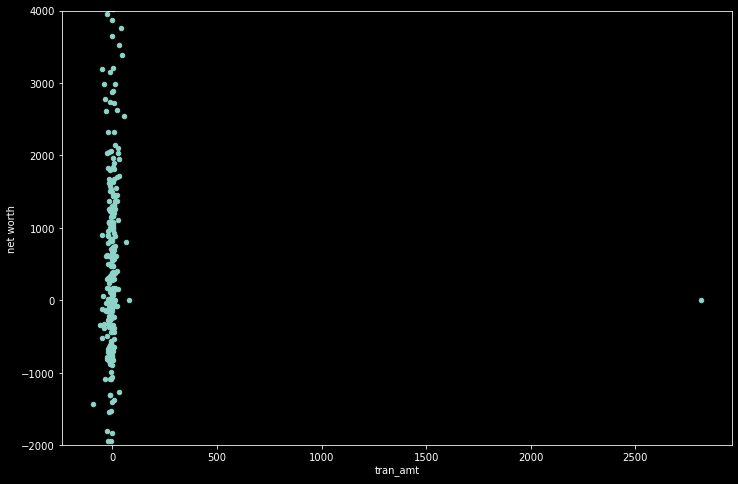

In [118]:
#scatter plot totalbsmtsf/saleprice
var = 'tran_amt' #: Total square feet of basement area
data = cust_behavior[['net worth',var]]
data.plot.scatter(x=var, y='net worth', ylim=(-2000,4000))

In [119]:
rows_to_drop =cust_behavior[cust_behavior['tran_amt']>500].index.to_list()
rows_to_drop

[1363146.0]

In [120]:
#customer_networth = customer_networth.drop(networth_outlier_ind)
cust_behavior = cust_behavior.drop(rows_to_drop)

In [121]:
cust_behavior_ind = cust_behavior[(cust_behavior['net worth']>5000)|(cust_behavior['net worth']<(-4000))].index
cust_behavior_ind

Float64Index([1362594.0, 1362622.0, 1362703.0, 1362725.0, 1362727.0, 1362766.0,
              1363008.0, 1363018.0, 1363083.0, 1363128.0, 1363215.0, 1363308.0,
              1363492.0],
             dtype='float64', name='customer_id')

In [122]:
cust_behavior = cust_behavior.drop(cust_behavior_ind)

In [123]:
cust_behavior_ind = cust_behavior[((cust_behavior['checking']<1)&(cust_behavior['saving']<1))|(cust_behavior['credit']<1)].index
cust_behavior_ind 

Float64Index([1362535.0, 1362568.0, 1362638.0, 1362657.0, 1362697.0, 1362701.0,
              1362864.0, 1362920.0, 1363035.0, 1363067.0, 1363090.0, 1363096.0,
              1363134.0, 1363326.0, 1363374.0, 1363383.0, 1363410.0, 1363453.0,
              1363486.0, 1363493.0],
             dtype='float64', name='customer_id')

In [124]:
cust_behavior = cust_behavior.drop(cust_behavior_ind)

In [125]:
cust_behavior['total transaction'] = cust_behavior['checking'] + cust_behavior['saving'] + cust_behavior['credit']

In [126]:
#assuming none of them have a line of credit
cust_behavior['positive networth'] = cust_behavior['checking balance'] + cust_behavior['saving balance']

In [127]:
cust_behavior = cust_behavior.drop(['checking balance','saving balance'], axis=1)

In [128]:
cust_behavior.head()

checking  saving  credit   tran_amt  credit balance  net worth  \
customer_id                                                                   
1362480.0          99      26      32  13.923503           20.00    1254.83   
1362484.0          99      33      55   1.793529          369.72    1847.77   
1362487.0          52      19      32 -34.496311         1548.23    -134.13   
1362489.0          99      22      35   3.843718           20.00     479.08   
1362508.0          99      33      87 -11.952146         1072.17    -741.95   

             total transaction  positive networth  
customer_id                                        
1362480.0                  157            1274.83  
1362484.0                  187            2217.49  
1362487.0                  103            1414.10  
1362489.0                  156             499.08  
1362508.0                  219             330.22

# PCA

In [129]:
features3 = cust_behavior.columns.to_list()

In [130]:
cust_behavior_scaled = scaler.fit_transform(cust_behavior)

In [131]:
cust_behavior_scaled = pd.DataFrame(cust_behavior_scaled,columns=features3)
cust_behavior_scaled.head()

checking    saving    credit  tran_amt  credit balance  net worth  \
0  0.465059  0.046915 -0.476373  1.033915       -0.988759   0.543851   
1  0.465059  0.679888  0.586379  0.368926       -0.653527   0.963487   
2 -1.459779 -0.586058 -0.476373 -1.620554        0.476163  -0.439144   
3  0.465059 -0.314784 -0.337753  0.481322       -0.988759  -0.005163   
4  0.465059  0.679888  2.064991 -0.384638        0.019824  -0.869310   

   total transaction  positive networth  
0           0.034457          -0.196941  
1           0.695041           0.508857  
2          -1.154594          -0.092666  
3           0.012438          -0.777769  
4           1.399664          -0.904200

In [132]:
pca = PCA(n_components=5)

In [133]:
cb_components = pca.fit_transform(cust_behavior_scaled)

In [134]:
cb_components.shape

(239, 5)

In [135]:
pca.explained_variance_

array([3.28294294, 1.72064938, 1.38078343, 0.79850443, 0.42927939])

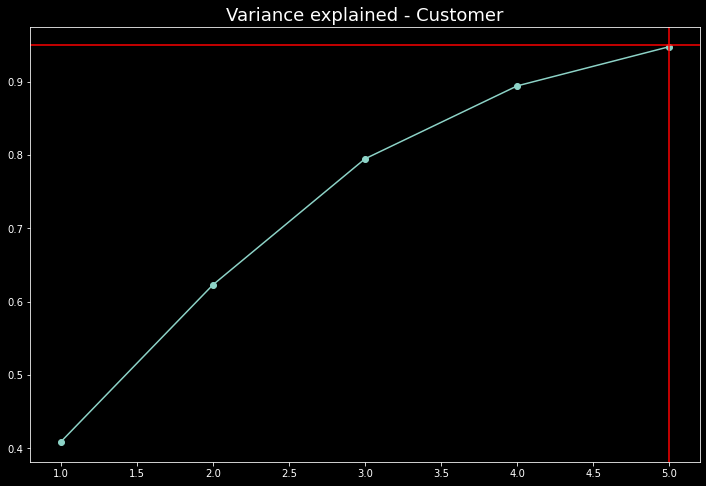

In [136]:
# Calculates the proportion of variance explained
var_exp_cust = np.cumsum(pca.explained_variance_ratio_)

# Plots the elbow plot for the wine pca
plt.plot(range(1,6), var_exp_cust, marker='o')
plt.title("Variance explained - Customer", fontsize=18);
plt.axhline(0.95,c='r')
plt.axvline(5,c='r')
plt.show()

In [137]:
pca.explained_variance_ratio_

array([0.40865085, 0.21418125, 0.17187576, 0.09939543, 0.0534354 ])

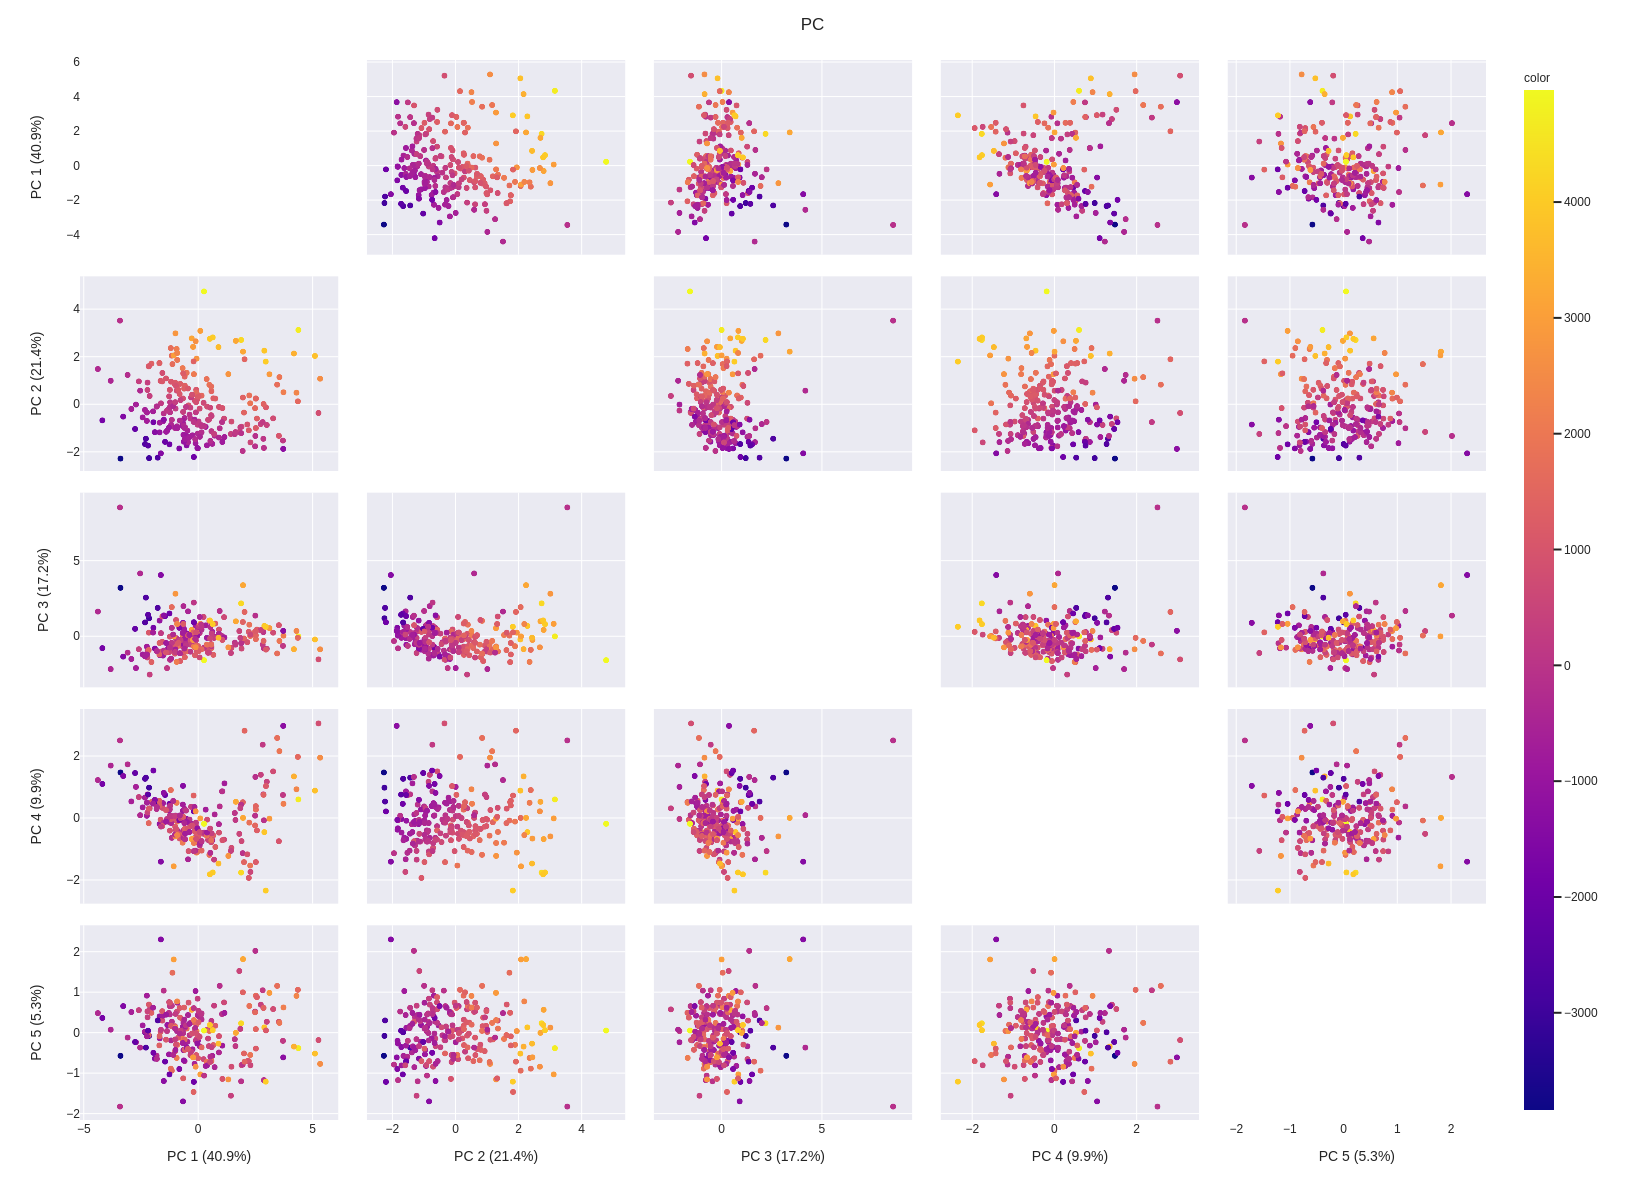

In [138]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    cb_components,
    labels=labels,
    dimensions=range(5),
    color = cust_behavior['net worth']
)
fig.update_traces(diagonal_visible=False)
fig.update_layout(
    title='PC',
    dragmode='select',
    width=1200,
    height=1200,
    hovermode='closest',
    template ="seaborn"
)
fig.show()

## Kmeans clustering

In [139]:
def update_plot_kmeans(n_clusters,PC_x,PC_y):
    km = KMeans(n_clusters=n_clusters, # how many clusters we expected 
    n_init=10, # how many initial runs
    random_state=0)
    
    # data side
    X = cb_components
    plt_cluster_centers= True
    
    y_km = km.fit_predict(X)
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_km):
        # y_res 
        x = X[y_km == cluster,PC_x]
        y = X[y_km == cluster,PC_y]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
        
    plt.xlabel(f'PC {PC_x+1}: {features3[PC_x]}')
    plt.ylabel(f'PC {PC_y+1}: {features3[PC_y]}')
    plt.title(f'Kmeans of PC{PC_x+1}: {features3[PC_x]} as X, PC{PC_y+1}: {features3[PC_y]} as Y')
    plt.legend()
    plt.grid()
    plt.show()
#     for i in range(len(X_centroids)):
#         print(f'cluser {i} X:{X_centroids[i]}, Y:{Y_centroids[i]}')

In [140]:
km = KMeans(n_clusters=5, # how many clusters we expected 
    n_init=10, # how many initial runs
    random_state=0)
y_kmnw = km.fit_predict(cb_components)
y_kmnw.shape

(239,)

In [141]:
widgets.interactive(update_plot_kmeans,n_clusters=n_clusters,PC_x=PC_x, PC_y=PC_y)

interactive(children=(IntSlider(value=3, description='Kmeans(n_clusters)', max=8, min=1), IntSlider(value=2, d…

In [142]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

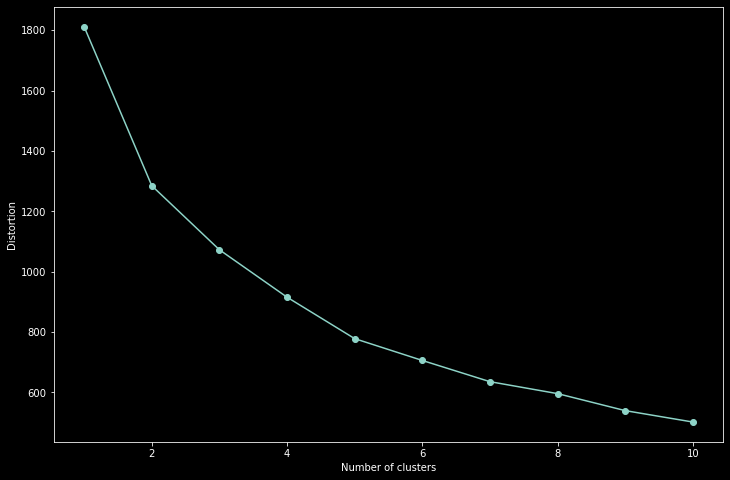

In [143]:
plot_distortion(cb_components,max_clusters=10)

## Feeding back into Pandas

In [144]:
cust_behavior['clustering'] = y_kmnw

In [145]:
cust_behavior.columns

Index(['checking', 'saving', 'credit', 'tran_amt', 'credit balance',
       'net worth', 'total transaction', 'positive networth', 'clustering'],
      dtype='object')

In [146]:
cust_behavior.head()

checking  saving  credit   tran_amt  credit balance  net worth  \
customer_id                                                                   
1362480.0          99      26      32  13.923503           20.00    1254.83   
1362484.0          99      33      55   1.793529          369.72    1847.77   
1362487.0          52      19      32 -34.496311         1548.23    -134.13   
1362489.0          99      22      35   3.843718           20.00     479.08   
1362508.0          99      33      87 -11.952146         1072.17    -741.95   

             total transaction  positive networth  clustering  
customer_id                                                    
1362480.0                  157            1274.83           4  
1362484.0                  187            2217.49           1  
1362487.0                  103            1414.10           4  
1362489.0                  156             499.08           4  
1362508.0                  219             330.22           1

In [147]:
cust_behavior.groupby(cust_behavior.clustering).mean()

checking     saving     credit   tran_amt  credit balance  \
clustering                                                               
0           99.000000  30.750000  47.312500 -32.189797     3690.893750   
1           99.000000  36.136364  65.393939  -3.853651      982.744394   
2           92.607143  26.250000  43.178571  -7.815003     1155.279286   
3           32.322581  16.870968  20.193548  14.114196      392.261613   
4           94.224490  19.948980  32.693878  -6.418859      845.740204   

              net worth  total transaction  positive networth  
clustering                                                     
0          -1852.412500         177.062500        1838.481250  
1            266.025606         200.530303        1248.770000  
2           2712.518929         162.035714        3867.798214  
3           1354.654516          69.387097        1746.916129  
4            105.914898         146.867347         951.655102

In [148]:
cust_behavior['total transaction'] = cust_behavior['checking']+cust_behavior['saving']+cust_behavior['credit']

In [149]:
radar_behavior = cust_behavior[['tran_amt', 'net worth','total transaction']].groupby(cust_behavior.clustering).mean()
radar_behavior 

tran_amt    net worth  total transaction
clustering                                           
0          -32.189797 -1852.412500         177.062500
1           -3.853651   266.025606         200.530303
2           -7.815003  2712.518929         162.035714
3           14.114196  1354.654516          69.387097
4           -6.418859   105.914898         146.867347

<AxesSubplot:>

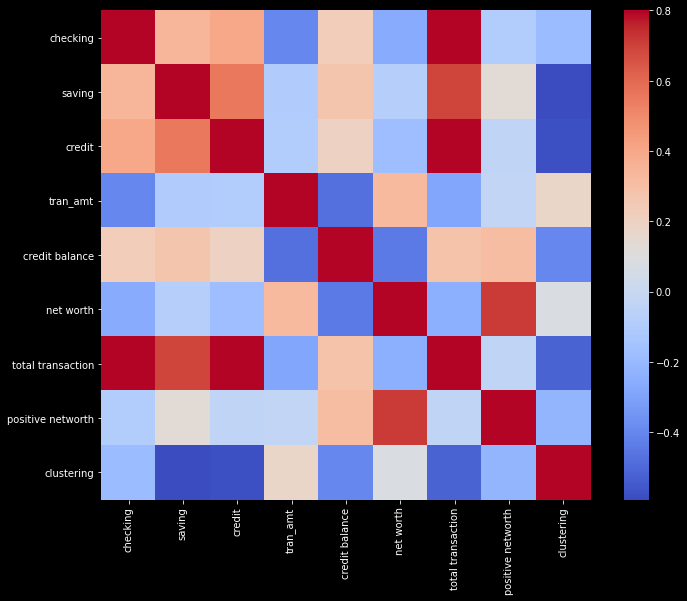

In [150]:
#correlation matrix
corrmat = cust_behavior.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap='coolwarm')

## We have to scale the data down
(I don't know how to make a log polar plot)

In [151]:

radar_behavior['net worth'] = radar_behavior['net worth']/100
radar_behavior['total transaction'] = radar_behavior['total transaction']/10

In [152]:
radar_behavior

tran_amt  net worth  total transaction
clustering                                         
0          -32.189797 -18.524125          17.706250
1           -3.853651   2.660256          20.053030
2           -7.815003  27.125189          16.203571
3           14.114196  13.546545           6.938710
4           -6.418859   1.059149          14.686735

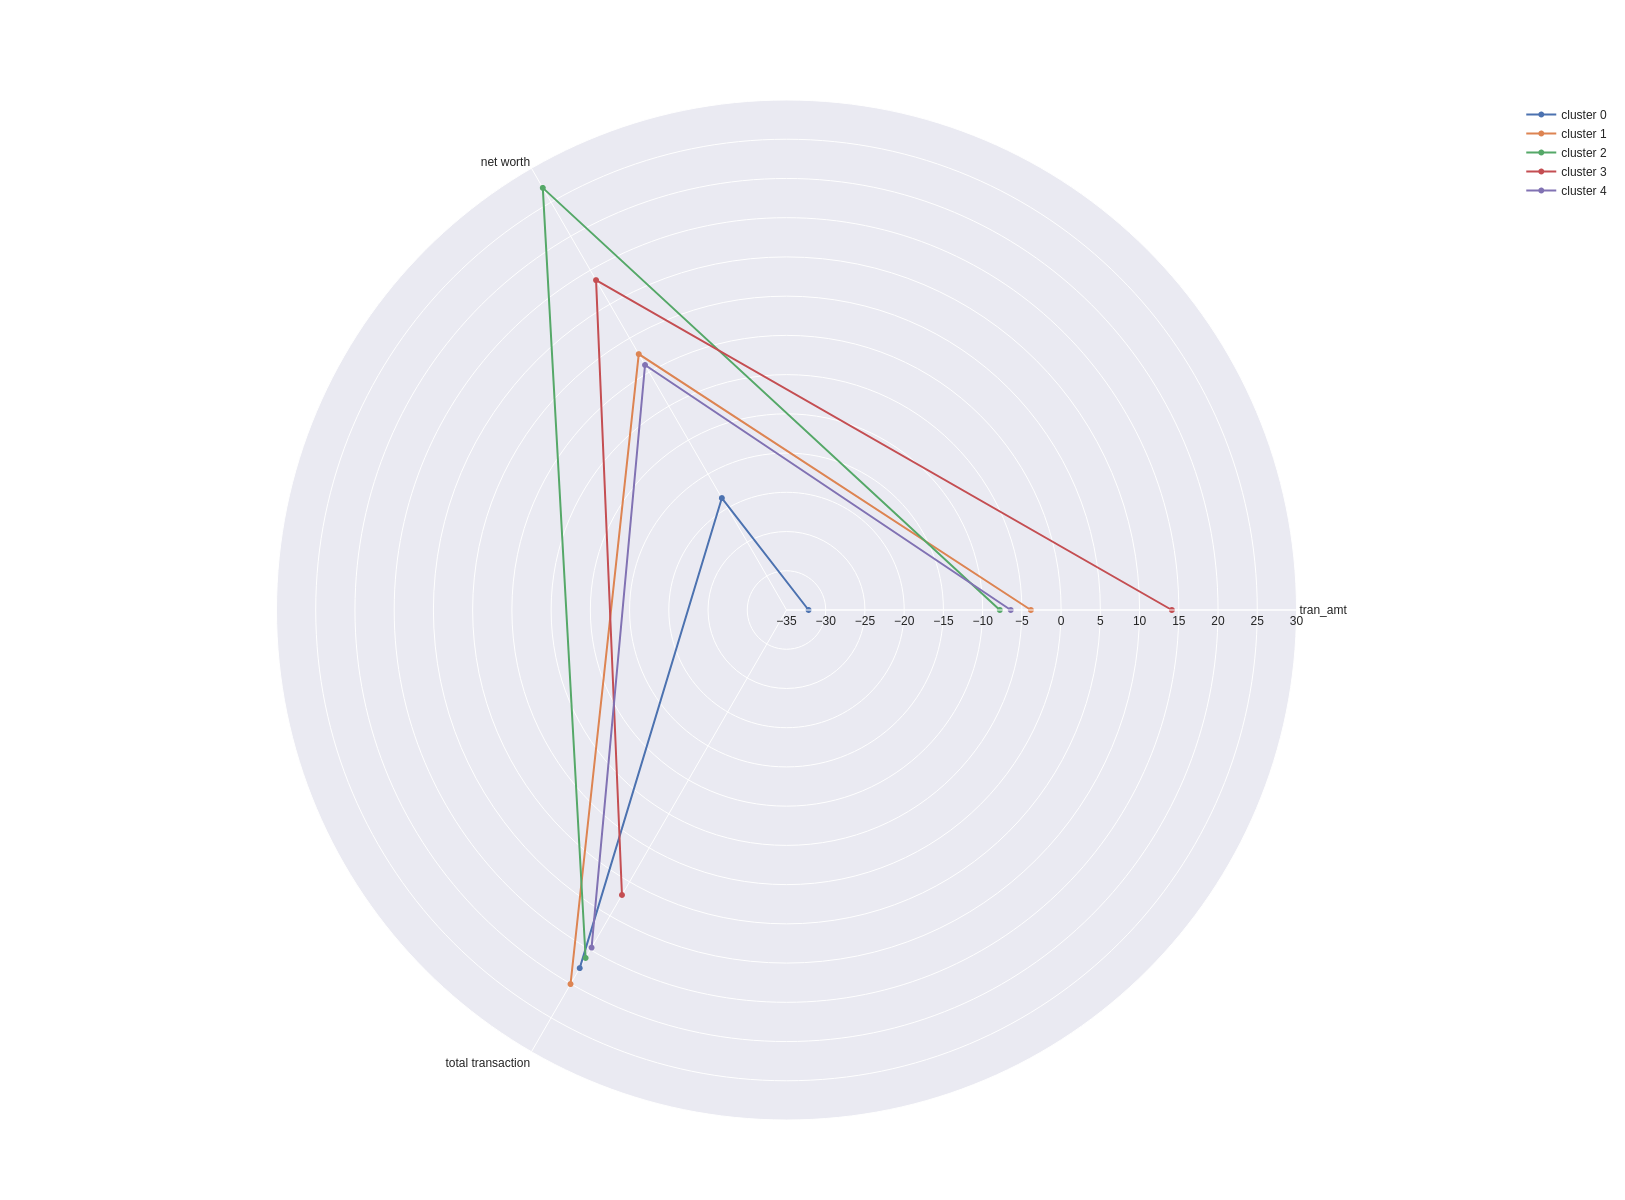

In [153]:
categories = radar_behavior.columns.tolist()

fig = go.Figure()

traces = [fig.add_trace(go.Scatterpolar(r=radar_behavior.loc[i],theta=categories,name=f'cluster {i}')) for i in range(len(radar_behavior.index))]

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-35, 30]
    )),
  showlegend=True
)
fig.update_layout(
    dragmode='select',
    width=1200,
    height=1200,
    hovermode='closest',
    template ="seaborn"
)
fig.show()

In [154]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
%matplotlib inline

In [155]:
# load the data
#usa = gpd.read_file(gpd.datasets.get_path('states.shp'))

usa = gpd.read_file('data/usa-states-census-2014.shp')

DriverError: data/usa-states-census-2014.shp: No such file or directory

In [ ]:
import plotly.figure_factory as ff

fips = ['06021', '06023', '06027',
        '06029', '06033', '06059',
        '06047', '06049', '06051',
        '06055', '06061']
values = range(len(fips))

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()